# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [77]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')


In [78]:
# Read the Mapbox API key
load_dotenv("/Users/FinTech/PycharmProjects/Bootcamp/api_keys.env")
map_box_api = os.getenv("mapbox")
type(map_box_api)

str

## Load Data

In [79]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [80]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_unit_by_year = sfo_data.groupby(["year"])["housing_units"].mean()
avg_unit_by_year.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [58]:
# Save the dataframe as a csv file
avg_unit_by_year.to_csv(index=False)

'372560\r\n374507\r\n376454\r\n378401\r\n380348\r\n382295\r\n384242\r\n'

<AxesSubplot:title={'center':'Housing Units in SF from 2010 to 2016'}, xlabel='year'>

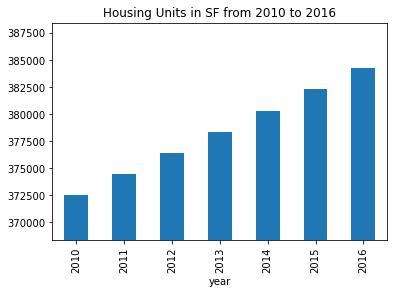

In [81]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
avg_unit_by_year.plot.bar(ylim=(370000,387500), title='Housing Units in SF from 2010 to 2016')


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
avg_unit_by_year.describe()
ymin = avg_unit_by_year.min() - avg_unit_by_year.std()
ymax = avg_unit_by_year.max() + avg_unit_by_year.std()
avg_unit_by_year.plot.bar(ylim=(ymin, ymax), title='Housing Units in SF from 2010 to 2016')

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [82]:
# Calculate the average sale price per square foot and average gross rent

avg_price_psf_by_year = sfo_data.groupby(["year"])["sale_price_sqr_foot"].mean()

avg_gross_rent_by_year = sfo_data.groupby(["year"])["gross_rent"].mean()

<AxesSubplot:title={'center':'Average Price per SqFt by year'}, xlabel='year'>

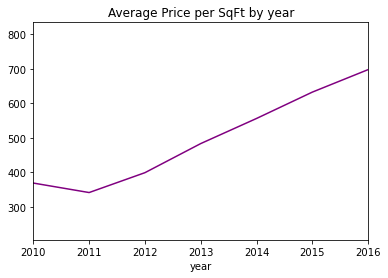

In [83]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
ymin2 = avg_price_psf_by_year.min() - avg_price_psf_by_year.std()
ymax2 = avg_price_psf_by_year.max() + avg_price_psf_by_year.std()
avg_price_psf_by_year.plot.line(ylim=(ymin2,ymax2), title='Average Price per SqFt by year', color='purple')

<AxesSubplot:title={'center':'Average Gross Rent by year'}, xlabel='year'>

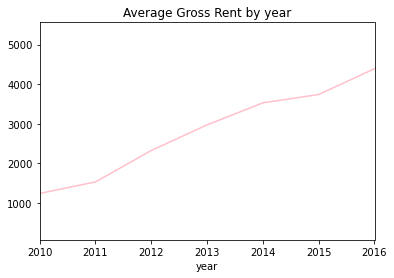

In [84]:
# Line chart for average montly rent
ymin3 = avg_gross_rent_by_year.min() - avg_gross_rent_by_year.std()
ymax3 = avg_gross_rent_by_year.max() + avg_gross_rent_by_year.std()
avg_gross_rent_by_year.plot.line(ylim=(ymin3,ymax3), title='Average Gross Rent by year', color='pink')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [85]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data.head()
avg_sale_price_sqr_foot_by_year_by_neighborhood = (sfo_data.groupby(['year', 'neighborhood'])['sale_price_sqr_foot'].mean())
avg_sale_price_sqr_foot_by_year_by_neighborhood.head()

avg_gross_rent_by_year_by_neighborhood = (sfo_data.groupby(['year', 'neighborhood'])['gross_rent'].mean())
avg_gross_rent_by_year_by_neighborhood.head()

year  neighborhood    
2010  Alamo Square        1239
      Anza Vista          1239
      Bayview             1239
      Buena Vista Park    1239
      Central Richmond    1239
Name: gross_rent, dtype: int64

In [64]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
avg_sale_price_sqr_foot_by_year_by_neighborhood.hvplot.line(groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [86]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
avg_gross_rent_by_year_by_neighborhood.hvplot.line(groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [87]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_sale_price_sqr_foot_by_neighborhood = (sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot'].mean().sort_values(ascending=False))
top10_neighborhood = avg_sale_price_sqr_foot_by_neighborhood[:10]
top10_neighborhood

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

In [67]:
# Plotting the data from the top 10 expensive neighborhoods
top10_neighborhood.hvplot.bar(title='Top 10 Expensive neighborhoods in SFO', ylabel='Avg. Sale Price per Square Foot', rot=60)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [88]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
avg_sale_rent = (sfo_data.groupby(['year','neighborhood'])['sale_price_sqr_foot','gross_rent'].mean())
avg_sale_rent.hvplot.bar(groupby='neighborhood', y=['sale_price_sqr_foot', 'gross_rent'])


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [89]:
# Load neighborhoods coordinates data
file_path2 = Path("Data/neighborhoods_coordinates.csv")
neigbh_coordinates = pd.read_csv(file_path2, index_col="Neighborhood")
neigbh_coordinates.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [90]:
# Calculate the mean values for each neighborhood
avg_sale_price_sqr_foot_by_neighborhood.head()

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Name: sale_price_sqr_foot, dtype: float64

In [91]:
# Join the average values with the neighborhood locations
join_df = pd.concat([neigbh_coordinates, avg_sale_price_sqr_foot_by_neighborhood], axis=1, join='inner')
join_df.head()

,Lat,Lon,sale_price_sqr_foot
Alamo Square,37.791012,-122.402100,366.020712
Anza Vista,37.779598,-122.443451,373.382198
Bayview,37.734670,-122.401060,204.588623
Bayview Heights,37.728740,-122.410980,590.792839
Buena Vista Park,37.768160,-122.439330,452.680591


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [92]:
# Set the Mapbox API
load_dotenv("/Users/FinTech/PycharmProjects/Bootcamp/api_keys.env")
map_box_api = os.getenv("mapbox")
type(map_box_api)
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    join_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color=join_df.index,
    zoom=4
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [93]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(top10_neighborhood.index)]
df_expensive_neighborhoods_per_year.head()
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [94]:
# Parallel Categories Plot
px.parallel_categories(
    df_expensive_neighborhoods_per_year,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Square Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

In [75]:
# Parallel Coordinates Plot
px.parallel_coordinates(df_expensive_neighborhoods_per_year, color='sale_price_sqr_foot')

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [76]:
# Sunburst Plot
px.sunburst(df_expensive_neighborhoods_per_year, color='sale_price_sqr_foot')